**Name:** Malacay, Francis Adrian B.


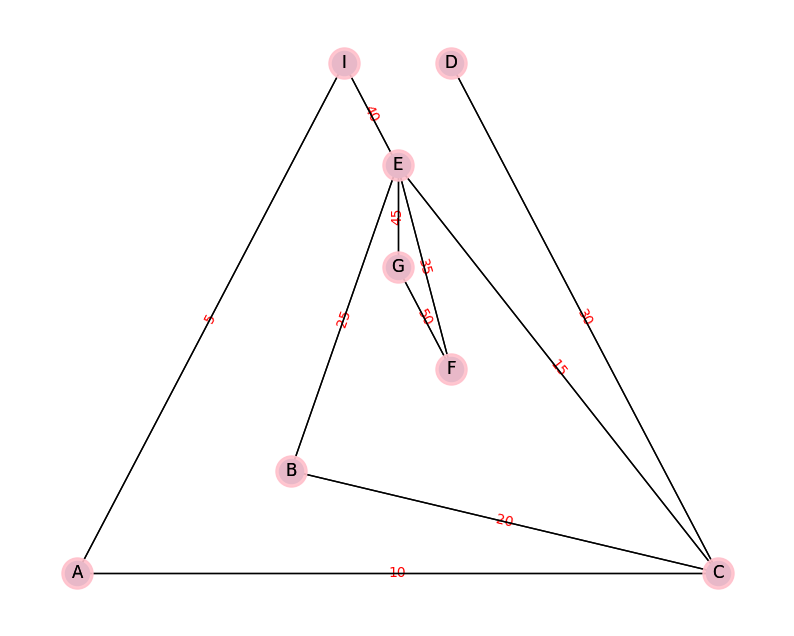

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

Kruskal's Algorithm
=

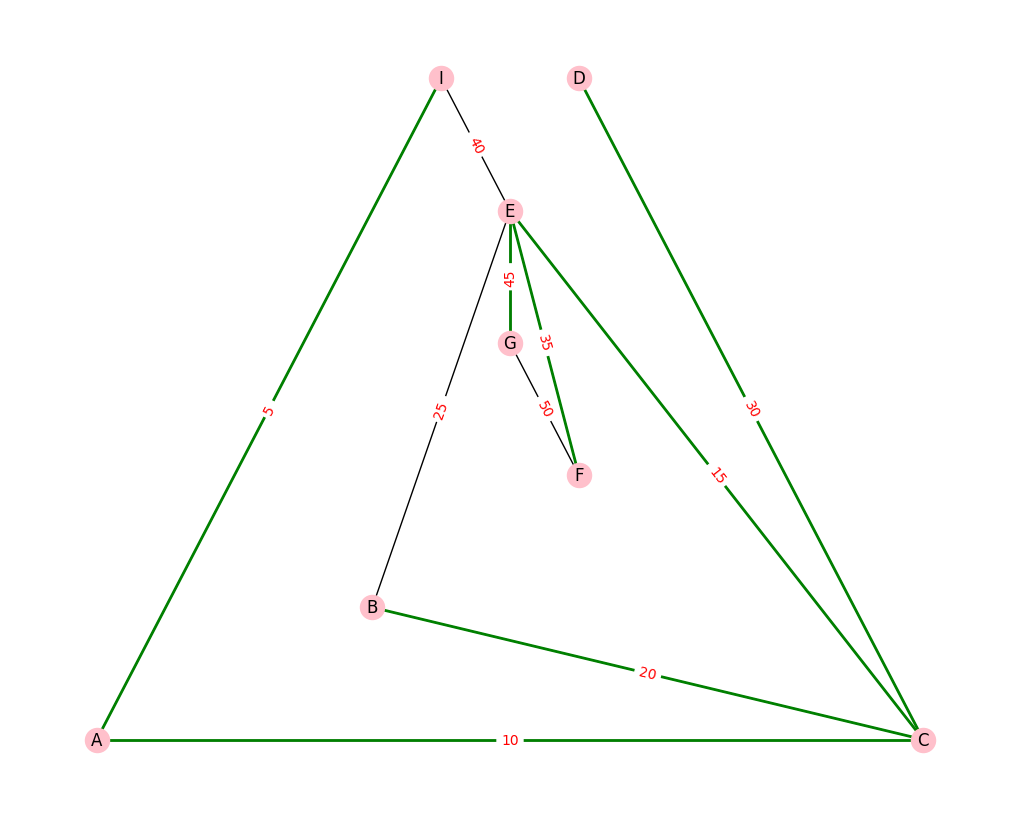

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
# Add self-loops to the remaining nodes
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]
G.add_edges_from(edgelist)

# Define edge labels
edge_labels = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45}

# Remove edge B-E from the list of edges considered for MST
edgelist_mst = edgelist.copy()
edgelist_mst.remove(("B", "E"))

# Construct the graph for MST without the edge B-E
G_mst = nx.Graph()
G_mst.add_nodes_from(G.nodes())
G_mst.add_edges_from(edgelist_mst)

# Compute the Minimum Spanning Tree using Kruskal's algorithm
mst_edges = nx.minimum_spanning_edges(G_mst, algorithm='kruskal', data=False)
mst = nx.Graph(mst_edges)

# Get positions for nodes
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw the original graph
nx.draw(G, pos=pos, with_labels=True, node_color='pink')

# Draw the MST edges, highlighting in green
for u, v in mst.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='green', width=2)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()

<div style="margin-left: auto; margin-right: auto; width: 50%;">

| Iteration Number | Edge Considered | Weight | Action Taken |
| :-: | :-: | :-: | :-: |
| 1 | (A, I) | 5 | added |
| 2 | (A, C) | 10 | added |
| 3 | (C, E) | 15 | added |
| 4 | (B, C) | 20 | added |
| 5 | (B, E) | 25 | none |
| 6 | (C, D) | 30 | added |
| 7 | (E, F) | 35 | added |
| 8 | (E, I) | 40 | none |
| 9 | (E, G) | 45 | added |
| 10 | (F, G) | 50 | none |

</div>

Prim's Algorithm
=

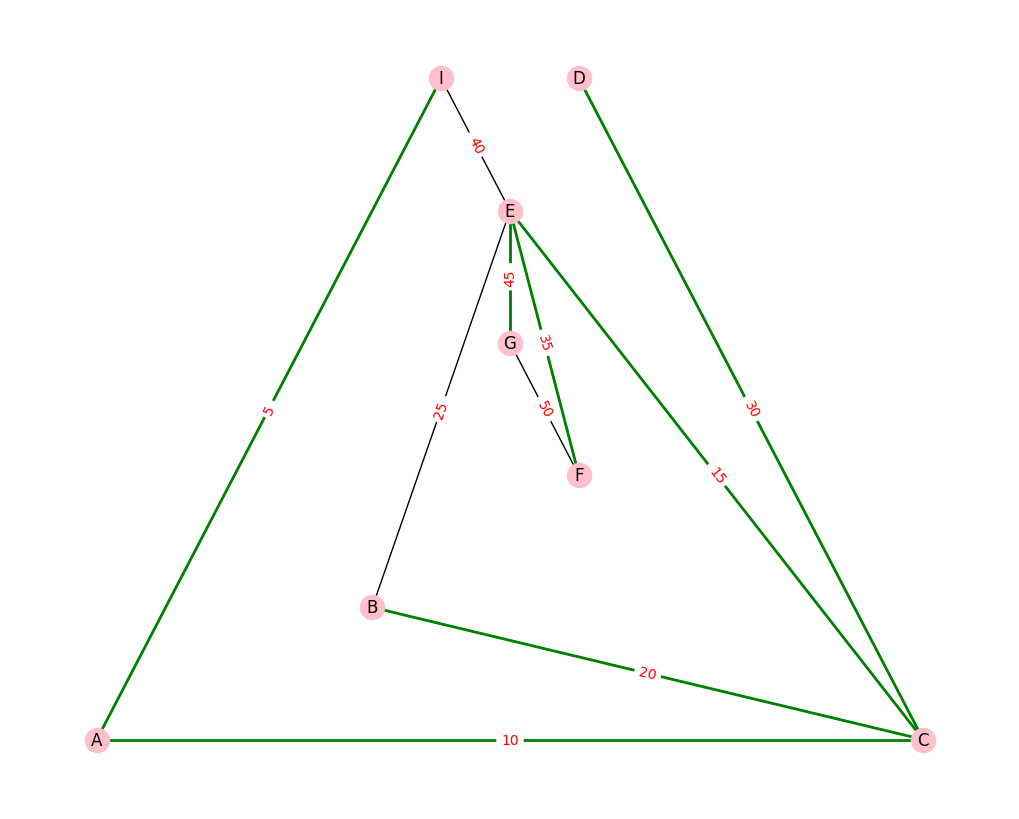

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
# Add self-loops to the remaining nodes
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]
G.add_edges_from(edgelist)

# Define edge labels
edge_labels = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45}

# Compute the Minimum Spanning Tree using Prim's algorithm
mst = nx.minimum_spanning_tree(G, algorithm='prim')

# Define edges to exclude from highlighting
edges_to_exclude = [("E", "B"), ("G", "F"), ("I", "E")]

# Remove excluded edges from the MST
for edge in edges_to_exclude:
    if mst.has_edge(*edge):
        mst.remove_edge(*edge)

# Define edges to highlight
edges_to_highlight = [("A", "I"), ("C", "B"), ("E", "G")]

# Add highlighted edges to the MST
mst.add_edges_from(edges_to_highlight)

# Get positions for nodes
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw the original graph
nx.draw(G, pos=pos, with_labels=True, node_color='pink')

# Draw the MST edges, highlighting in green
nx.draw_networkx_edges(mst, pos=pos, edge_color='green', width=2)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()

<div style="margin-left: auto; margin-right: auto; width: 50%;">

| Iteration Number | Vertex Added | Edge Added | Weight |
| :-: | :-: | :-: | :-: |
| 0   | I   |     |     |
| 1 | A | (I, A) | 5 |
| 2 | C | (A, C) | 10 |
| 3 | E | (C, E) | 15 |
| 4 | B | (C, B) | 20 |
| 5 | D | (C, D) | 30 |
| 6 | F | (E, F) | 35 |
| 7 | G | (E, G) | 45 | 

</div>

Djitraka's Shortest Path Algorithm
=

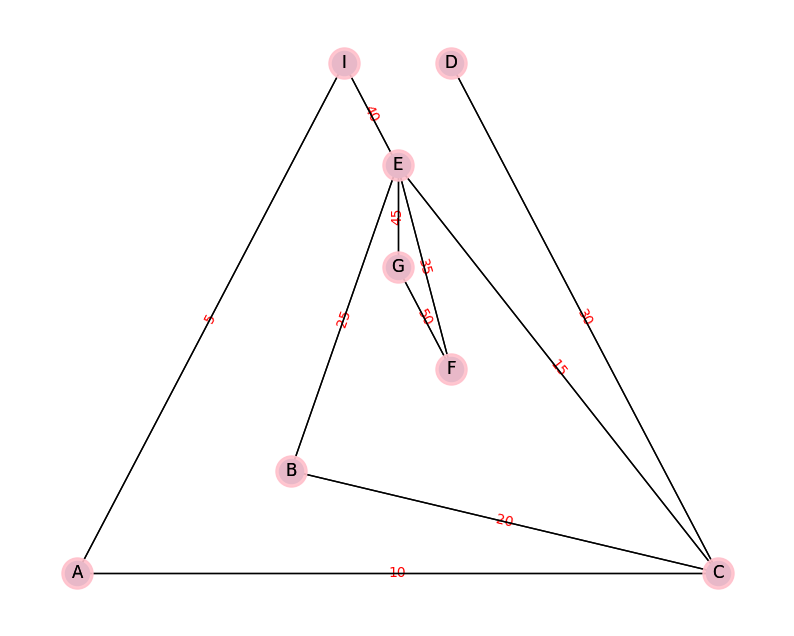

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

Shortest Paths Using Vertex A
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 0 | |
| B | 30 | C |
| C | 10 | A |
| D | 40 | C |
| E | 25 | C |
| F | 60 | E |
| G | 70 | E |
| I | 5  | A |

</div>

Shortest Paths Using Vertex B
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 30 | C |
| B | 0 | |
| C | 20 | B |
| D | 50 | C |
| E | 25 | B |
| F | 60 | E |
| G | 70 | E |
| I | 35 | A |

</div>

Shortest Paths Using Vertex C
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 10 | C |
| B | 20 | C |
| C | 0 | |
| D | 30 | C |
| E | 15 | C |
| F | 50 | E |
| G | 60 | E |
| I | 15 | A |

</div>

Shortest Paths Using Vertex D
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 40 | C |
| B | 50 | C |
| C | 30 | D |
| D | 0 | |
| E | 45 | C |
| F | 80 | E |
| G | 90 | E |
| I | 45 | A |

</div>

Shortest Paths Using Vertex E
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 25 | C |
| B | 25 | E |
| C | 15 | E |
| D | 45 | C |
| E | 0 | |
| F | 35 | E |
| G | 45 | E |
| I | 30 | A |

</div>

Shortest Paths Using Vertex F
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 60 | C |
| B | 60 | E |
| C | 50 | E |
| D | 80 | C |
| E | 35 | F |
| F | 0 | |
| G | 50 | F |
| I | 65 | A |

</div>

Shortest Paths Using Vertex G
-

<div style="margin-left: auto; margin-right: auto; width: 50%;">


| Destination | Shortest Distance  | Previous |
| :-: | :-: | :-: |
| A | 70 | C |
| B | 70 | E |
| C | 60 | E |
| D | 90 | C |
| E | 45 | G |
| F | 50 | G |
| G | 0  | |
| I | 75 | A |

</div>